In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()
print(type(diabetes))
dir(diabetes)
diabetes?

<class 'sklearn.utils._bunch.Bunch'>


Type:        Bunch
String form:
{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
           0.01990749, -0 <...> raw.csv.gz', 'target_filename': 'diabetes_target.csv.gz', 'data_module': 'sklearn.datasets.data'}
Length:      8
File:        ~/miniconda3/lib/python3.12/site-packages/sklearn/utils/_bunch.py
Docstring:  
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> from sklearn.utils import Bunch
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
print(diabetes['target_filename'])
print(diabetes['feature_names'])

diabetes_target.csv.gz
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [11]:
df = pd.DataFrame(
    data=np.c_[diabetes['data'], diabetes['target']], 
    columns=np.append(diabetes['feature_names'], ['target']))

df['class'] = diabetes['target']

print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  class  
0   -0.002592  0.019907 

<Axes: xlabel='age', ylabel='bmi'>

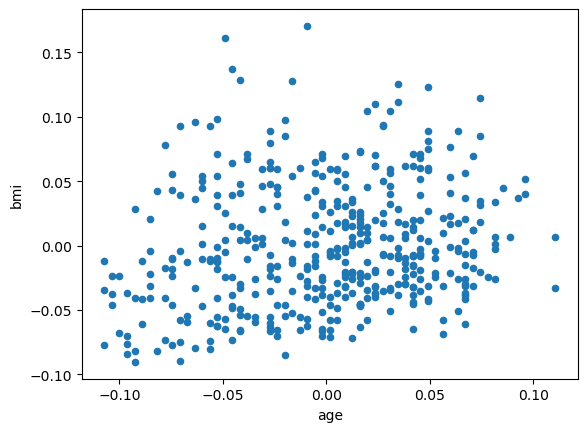

In [20]:
df.plot(kind = 'scatter', 
        x = 'age', 
        y = 'bmi',)
        #c = 'class'

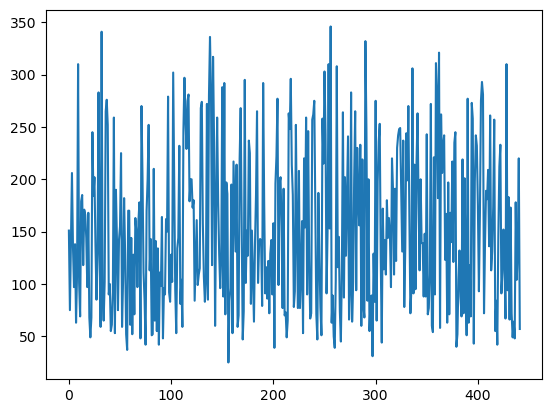

In [24]:
plt.plot(df['target'])

This was a regression dataset- the target vaeiable is a value that has to be predicted not a category that would be used in a classification problem.

For now, just converting it into two classes for plotting.

In [40]:
s = df["target"]
print(type(s))
n = s.to_numpy()
print(n.sum()/len(n))

<class 'pandas.core.series.Series'>
152.13348416289594


In [41]:
def addcolor(diabetes):
    if diabetes > 152:
        return 'red'
    return 'blue'

df['colors'] = df['class'].apply(addcolor)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  class colors  
0   -0.002592  0.

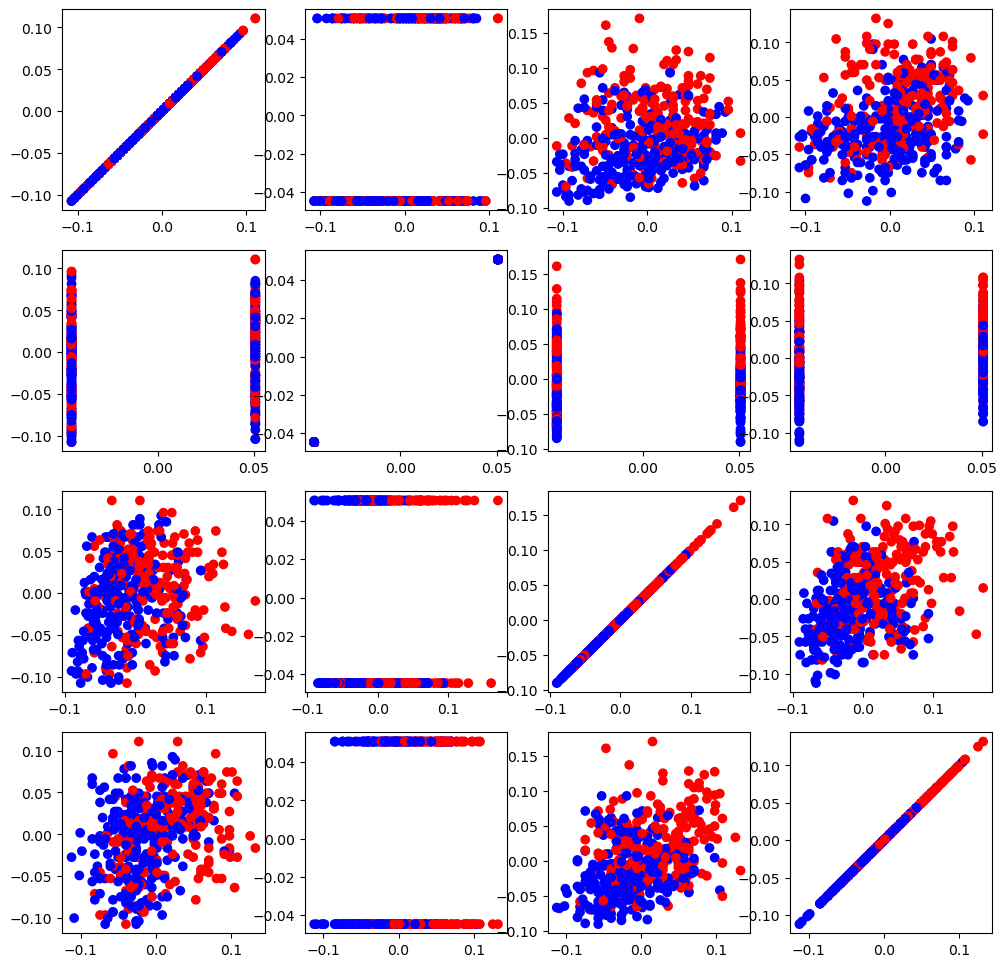

In [42]:
fig, ax = plt.subplots(4,4, figsize = (12, 12))#change the size of the blobs
for r, ar in enumerate(ax):
    for c, ac in enumerate(ar):
        ac.scatter(x = df.iloc[:, r],
                   y = df.iloc[:, c],
                  c = df.colors)